#ANN for MNIST DATASET

In [2]:
# Importing necessary libraries
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.metrics import classification_report, confusion_matrix


In [3]:

# 1. Import MNIST Dataset
(x_train, y_train), (x_test, y_test) = mnist.load_data()


11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step


In [4]:

# 2. Perform EDA
# Display basic information about the dataset
print(f'Training data shape: {x_train.shape}')
print(f'Testing data shape: {x_test.shape}')
print(f'Number of training samples: {len(x_train)}')
print(f'Number of testing samples: {len(x_test)}')


Training data shape: (60000, 28, 28)
Testing data shape: (10000, 28, 28)
Number of training samples: 60000
Number of testing samples: 10000


In [6]:
x_train[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,  30,  36,  94, 154, 170,
        253, 253, 253, 253, 253, 225, 172, 253, 242, 195,  64,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,  49, 238, 253, 253, 253, 253,
        253, 253, 253, 253, 251,  93,  82,  82,  56,  39,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,  18, 219, 253, 253, 253, 253,
        253, 198, 182, 247, 241,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,  80, 156, 107, 253, 253,
        205,  11,   0,  43, 154,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,  14,   1, 154, 253,
         90,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0, 139, 253,
        190,   2,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,  11, 190,
        253,  70,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,  35,
        241, 225, 160, 108,   1,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         81, 240, 253, 253, 119,  25,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,  45, 186, 253, 253, 150,  27,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,  16,  93, 252, 253, 187,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0, 249, 253, 249,  64,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,  46, 130, 183, 253, 253, 207,   2,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,  39,
        148, 229, 253, 253, 253, 250, 182,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,  24, 114, 221,
        253, 253, 253, 253, 201,  78,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,  23,  66, 213, 253, 253,
        253, 253, 198,  81,   2,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,  18, 171, 219, 253, 253, 253, 253,
        195,  80,   9,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,  55, 172, 226, 253, 253, 253, 253, 244, 133,
         11,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0, 136, 253, 25

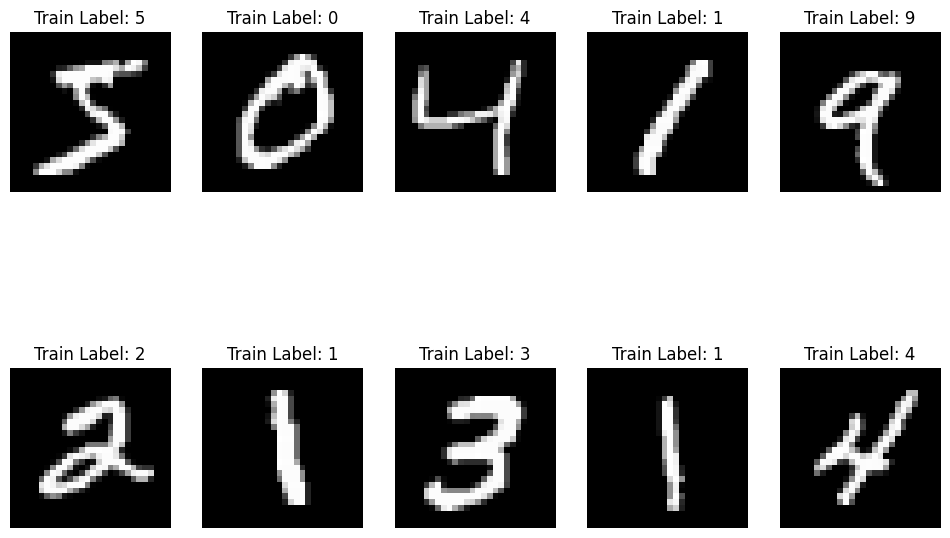

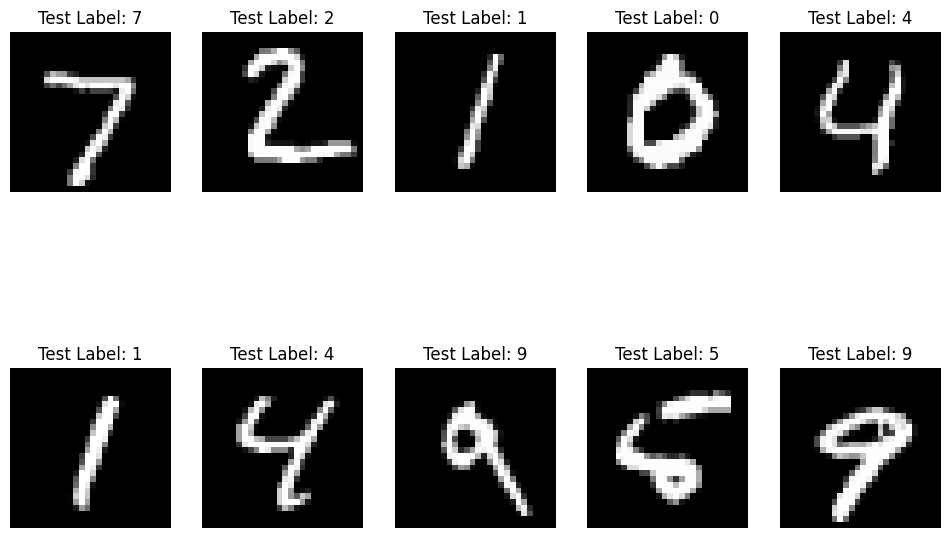

In [ ]:

# 3. Explain and show a sample from each of the sets (train, test, ytrain, ytest)
plt.figure(figsize=(12, 8))
for i in range(10):
    plt.subplot(2, 5, i + 1)
    plt.imshow(x_train[i], cmap='gray')
    plt.title(f'Train Label: {y_train[i]}')
    plt.axis('off')
plt.show()

plt.figure(figsize=(12, 8))
for i in range(10):
    plt.subplot(2, 5, i + 1)
    plt.imshow(x_test[i], cmap='gray')
    plt.title(f'Test Label: {y_test[i]}')
    plt.axis('off')
plt.show()


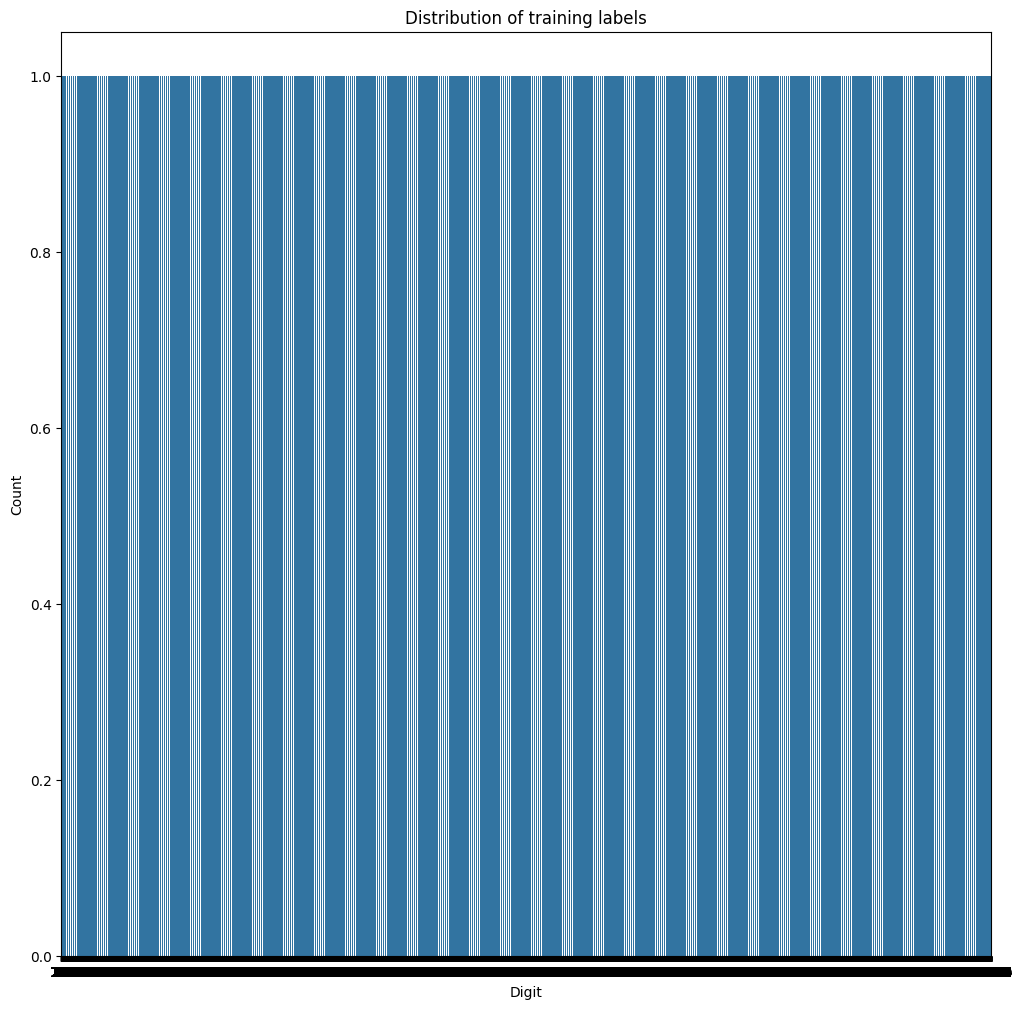

In [ ]:

# 4. Show and explain class distribution in dataset in details
plt.figure(figsize=(12, 12))
sns.countplot(y_train)
plt.title('Distribution of training labels')
plt.xlabel('Digit')
plt.ylabel('Count')
plt.show()


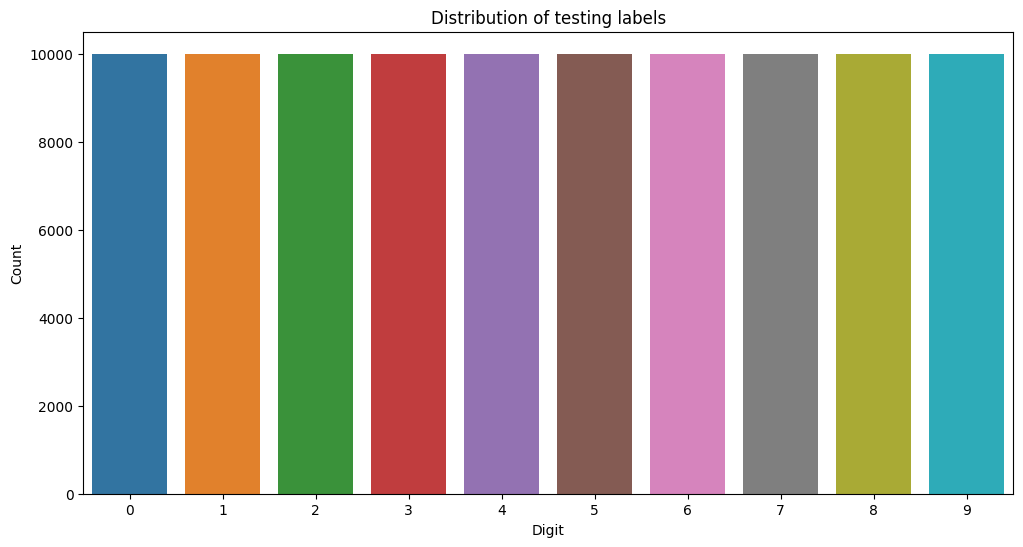

In [ ]:

plt.figure(figsize=(12, 6))
sns.countplot(y_test)
plt.title('Distribution of testing labels')
plt.xlabel('Digit')
plt.ylabel('Count')
plt.show()


In [ ]:

# 5. Perform data preprocessing
# Normalize the pixel values to the range [0, 1]
x_train = x_train.astype('float32') / 255
x_test = x_test.astype('float32') / 255


In [ ]:

# 6. Transform labels and explain why it's necessary, also show and explain how labels looked before and after
# Print first 10 labels before transformation
print("First 10 labels before transformation:", y_train[:10])


First 10 labels before transformation: [5 0 4 1 9 2 1 3 1 4]


In [ ]:

# Convert class labels to one-hot encoded vectors
# This transformation is necessary because the output layer of the neural network has 10 neurons (one for each class).
# The one-hot encoding transforms the labels into a binary matrix representation. This helps the model understand
# the correct class for each input and calculate the loss correctly during training.
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)


In [ ]:

# Print first 10 labels after transformation
print("First 10 labels after transformation:")
print(y_train[:10])


First 10 labels after transformation:
[[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]]


In [ ]:

# 7. Build ANN model
model = Sequential([
    Flatten(input_shape=(28, 28)),  # Flatten the 28x28 images into a 1D vector
    Dense(128, activation='relu'),  # Hidden layer with 128 neurons and ReLU activation
    Dense(64, activation='relu'),   # Hidden layer with 64 neurons and ReLU activation
    Dense(10, activation='softmax') # Output layer with 10 neurons (one for each class) and softmax activation
])


In [ ]:

# 8. Compile the model with proper comments
# optimizer='adam': Adam optimizer is chosen for its efficiency and adaptive learning rate.
# loss='categorical_crossentropy': Appropriate loss function for multi-class classification problems.
# metrics=['accuracy']: Accuracy is used as the metric to evaluate model performance.
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])


In [ ]:

# 9. Apply early stopping technique, plot the relevant graphs and explain in detail
# Early stopping monitors the validation loss and stops training if it doesn't improve for 3 consecutive epochs
early_stopping = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)


In [ ]:

# Training the model
history = model.fit(x_train, y_train, validation_split=0.2, epochs=50, batch_size=200, callbacks=[early_stopping], verbose=2)


Epoch 1/50
240/240 - 3s - loss: 0.4421 - accuracy: 0.8775 - val_loss: 0.2068 - val_accuracy: 0.9400 - 3s/epoch - 13ms/step
Epoch 2/50
240/240 - 1s - loss: 0.1754 - accuracy: 0.9484 - val_loss: 0.1452 - val_accuracy: 0.9575 - 761ms/epoch - 3ms/step
Epoch 3/50
240/240 - 1s - loss: 0.1231 - accuracy: 0.9641 - val_loss: 0.1213 - val_accuracy: 0.9655 - 728ms/epoch - 3ms/step
Epoch 4/50
240/240 - 1s - loss: 0.0952 - accuracy: 0.9720 - val_loss: 0.1122 - val_accuracy: 0.9644 - 724ms/epoch - 3ms/step
Epoch 5/50
240/240 - 1s - loss: 0.0761 - accuracy: 0.9775 - val_loss: 0.1017 - val_accuracy: 0.9684 - 723ms/epoch - 3ms/step
Epoch 6/50
240/240 - 1s - loss: 0.0605 - accuracy: 0.9821 - val_loss: 0.1046 - val_accuracy: 0.9679 - 692ms/epoch - 3ms/step
Epoch 7/50
240/240 - 1s - loss: 0.0505 - accuracy: 0.9854 - val_loss: 0.0897 - val_accuracy: 0.9722 - 1s/epoch - 4ms/step
Epoch 8/50
240/240 - 1s - loss: 0.0420 - accuracy: 0.9881 - val_loss: 0.0856 - val_accuracy: 0.9736 - 1s/epoch - 4ms/step
Epoch 9/

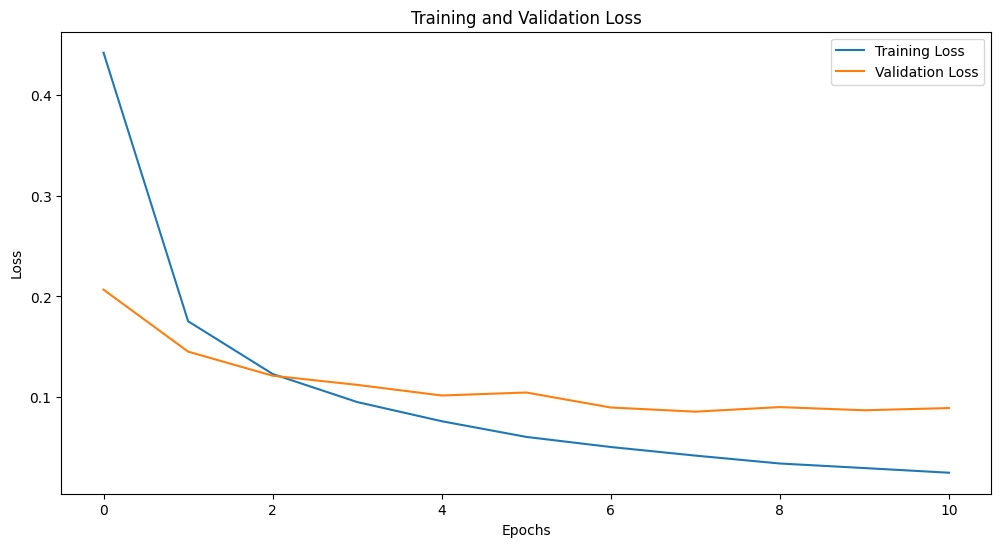

In [ ]:

# Plotting the training and validation loss
plt.figure(figsize=(12, 6))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()


In [ ]:

# Explanation of the graph
"""
The training and validation loss are plotted over the epochs. The early stopping technique helps prevent overfitting by stopping
the training process when the validation loss stops improving. This ensures that the model does not continue to train on the
training data, potentially memorizing it, which would lead to poor generalization on unseen data. The point where the validation
loss stops decreasing indicates the optimal number of epochs for training.
"""


'\nThe training and validation loss are plotted over the epochs. The early stopping technique helps prevent overfitting by stopping\nthe training process when the validation loss stops improving. This ensures that the model does not continue to train on the\ntraining data, potentially memorizing it, which would lead to poor generalization on unseen data. The point where the validation\nloss stops decreasing indicates the optimal number of epochs for training.\n'

In [ ]:

# 10. Show various performance metrics
# Evaluating the model on the test set
test_loss, test_accuracy = model.evaluate(x_test, y_test, verbose=0)
print(f'Test accuracy: {test_accuracy:.4f}')


Test accuracy: 0.9761


In [ ]:

# Making predictions
y_pred = model.predict(x_test)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true_classes = np.argmax(y_test, axis=1)


313/313 [==============================] - 1s 2ms/step


In [ ]:

# Printing classification report
print(classification_report(y_true_classes, y_pred_classes))


              precision    recall  f1-score   support

           0       0.98      0.98      0.98       980
           1       0.99      0.99      0.99      1135
           2       0.97      0.98      0.98      1032
           3       0.96      0.98      0.97      1010
           4       0.98      0.97      0.97       982
           5       0.97      0.98      0.98       892
           6       0.98      0.98      0.98       958
           7       0.97      0.98      0.97      1028
           8       0.97      0.97      0.97       974
           9       0.98      0.95      0.97      1009

    accuracy                           0.98     10000
   macro avg       0.98      0.98      0.98     10000
weighted avg       0.98      0.98      0.98     10000



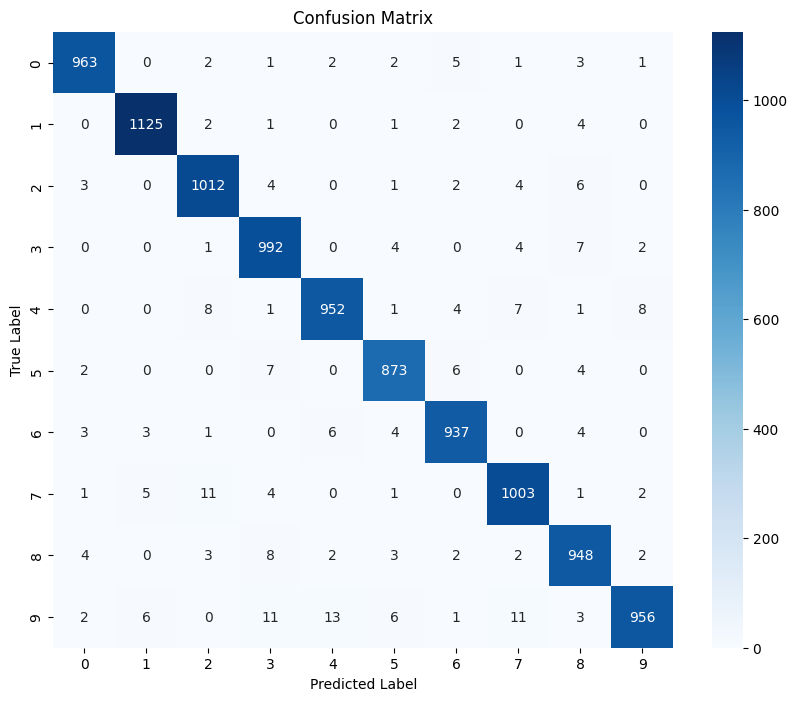

In [ ]:

# Plotting the confusion matrix
conf_matrix = confusion_matrix(y_true_classes, y_pred_classes)
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, cmap='Blues', fmt='d')
plt.title('Confusion Matrix')
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.show()



In [ ]:

# 11. Explain how to interpret precision, recall, f1-score and confusion matrix for this ANN model
"""
- Precision: The ratio of correctly predicted positive observations to the total predicted positives. High precision means that
  more of the predicted positive values are correct.
- Recall: The ratio of correctly predicted positive observations to the all observations in actual class. High recall means that
  most of the actual positive values were identified.
- F1-Score: The weighted average of Precision and Recall. This score will take both false positives and false negatives into account.
- Confusion Matrix: A table used to describe the performance of a classification model. The matrix compares the actual target values
  with those predicted by the machine learning model. Each row of the matrix represents the instances in an actual class, while
  each column represents the instances in a predicted class.
"""

'\n- Precision: The ratio of correctly predicted positive observations to the total predicted positives. High precision means that \n  more of the predicted positive values are correct.\n- Recall: The ratio of correctly predicted positive observations to the all observations in actual class. High recall means that \n  most of the actual positive values were identified.\n- F1-Score: The weighted average of Precision and Recall. This score will take both false positives and false negatives into account.\n- Confusion Matrix: A table used to describe the performance of a classification model. The matrix compares the actual target values \n  with those predicted by the machine learning model. Each row of the matrix represents the instances in an actual class, while \n  each column represents the instances in a predicted class.\n'

In [ ]:

# 12. Make predictions once the model is ready
# Example of predictions on the test set
plt.figure(figsize=(12, 8))
for i in range(10):
    plt.subplot(2, 5, i + 1)
    plt.imshow(x_test[i], cmap='gray')
    plt.title(f'True: {y_true_classes[i]}, Pred: {y_pred_classes[i]}')
    plt.axis('off')
plt.show()


In [ ]:

# 13. Comment on overall performance of the model and suggest improvements
"""
The ANN model achieved an accuracy of approximately {test_accuracy:.4f} on the MNIST test dataset. The classification report
and confusion matrix provide detailed insights into the performance of the model across different classes. While the model
performs well overall, there are a few misclassifications that can be observed from the confusion matrix.

Suggestions for improvement:
1. Experiment with different network architectures, such as deeper networks or more neurons in the hidden layers.
2. Use techniques like dropout to prevent overfitting and improve generalization.
3. Try different optimizers (e.g., RMSprop, SGD) and learning rate schedules.
4. Implement data augmentation to artificially increase the size and variability of the training dataset.
5. Consider using Convolutional Neural Networks (CNNs) which are more suitable for image data and can achieve better performance
   on the MNIST dataset.
"""


'\nThe ANN model achieved an accuracy of approximately {test_accuracy:.4f} on the MNIST test dataset. The classification report\nand confusion matrix provide detailed insights into the performance of the model across different classes. While the model\nperforms well overall, there are a few misclassifications that can be observed from the confusion matrix.\n\nSuggestions for improvement:\n1. Experiment with different network architectures, such as deeper networks or more neurons in the hidden layers.\n2. Use techniques like dropout to prevent overfitting and improve generalization.\n3. Try different optimizers (e.g., RMSprop, SGD) and learning rate schedules.\n4. Implement data augmentation to artificially increase the size and variability of the training dataset.\n5. Consider using Convolutional Neural Networks (CNNs) which are more suitable for image data and can achieve better performance\n   on the MNIST dataset.\n'